# Web Data Science Final Project - Jack Stein
For this project I will be trying to figure out can we predict the best picture winner using Oscar Movie Data?

The data for this project was collected through multiple differnet methods. First, using a Selenium driver I searched for all the [Oscar](https://awardsdatabase.oscars.org) 'Best Picture' nominees and winners since 2000. From there I used [The Movie Database API](https://developer.themoviedb.org/docs) to collect some more information about each movie. Finally, using Selenium once more, I collected all the [Rotten Tomatoes](https://www.rottentomatoes.com) rating from both the audience and the critics. Together we have a useable dataset to answer our research questions.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.float_format = '{:,}'.format

In [53]:
oscar_df = pd.read_csv("oscars.csv")
oscar_df

,Unnamed: 0,year,award year,movie,producers,winner,TMDB_id,imdb_id,budget,revenue,popularity,genre,adult,production_companies,release_date,vote_average,runtime(mins),average_rating_c,liked_count_c,not_liked_count_c,rating_count_c,state_c,value_c,average_rating_a,liked_count_a,not_liked_count_a,rating_count_a,review_count_a,value_a
0,0,2000,(73rd),Chocolat,"David Brown, Kit Golden and Leslie Holleran",False,392,tt0241303,25000000,152500343,16.956,Comedy,False,"['Fat Free', 'Miramax', 'David Brown Productio...",2000-12-22,7.0,121,6.0,75.0,44.0,119.0,fresh,63.0,4.0,35771,7232,329145,13002,83
1,1,2000,(73rd),"Crouching Tiger, Hidden Dragon","Bill Kong, Hsu Li Kong and Ang Lee",False,146,tt0190332,17000000,213525736,24.728,Adventure,False,"['China Film Co-Production Corporation', 'Colu...",2000-07-06,7.41,120,8.7,166.0,4.0,170.0,certified-fresh,98.0,4.1,29180,4725,427892,13700,86
2,2,2000,(73rd),Erin Brockovich,"Danny DeVito, Michael Shamberg and Stacey Sher",False,462,tt0195685,52000000,256271286,23.903,Drama,False,['Jersey Films'],2000-03-17,7.42,131,7.5,127.0,23.0,150.0,certified-fresh,85.0,3.9,13393,3174,418943,8239,81
3,3,2000,(73rd),Gladiator,"Douglas Wick, David Franzoni and Branko Lustig",True,98,tt0172495,103000000,465361176,63.604,Action,False,"['Universal Pictures', 'Scott Free Productions...",2000-05-04,8.21,155,7.4,205.0,52.0,257.0,certified-fresh,80.0,3.8,170538,24401,34128168,1652336,87
4,4,2000,(73rd),Traffic,"Edward Zwick, Marshall Herskovitz and Laura Bi...",False,1900,tt0181865,48000000,207515725,22.661,Thriller,False,"['USA Films', 'Compulsion Inc.', 'Initial Ente...",2000-12-27,7.051,147,NaN,NaN,NaN,NaN,NaN,NaN,3.8,170538,24401,34128168,1652336,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,2022,(95th),The Fabelmans,"Kristie Macosko Krieger, Steven Spielberg and ...",False,804095,tt14208870,40000000,45629909,48.037,Drama,False,"['Amblin Entertainment', 'Reliance Entertainme...",2022-11-11,7.71,151,8.2,359.0,31.0,390.0,certified-fresh,92.0,4.2,1271,265,1536,726,83
167,167,2022,(95th),Tár,"Todd Field, Alexandra Milchan and Scott Lambert",False,817758,tt14444726,35000000,29000000,37.083,Drama,False,"['Focus Features', 'Standard Film Company', 'E...",2022-09-23,7.1,158,8.3,315.0,33.0,348.0,certified-fresh,91.0,3.9,336,121,457,222,74
168,168,2022,(95th),Top Gun: Maverick,"Tom Cruise, Christopher McQuarrie, David Ellis...",False,361743,tt1745960,170000000,1488732821,233.234,Action,False,"['Skydance', 'Don Simpson/Jerry Bruckheimer Fi...",2022-05-24,8.246,131,8.2,456.0,20.0,476.0,certified-fresh,96.0,4.9,62970,783,63753,29698,99
169,169,2022,(95th),Triangle of Sadness,Erik Hemmendorff and Philippe Bober,False,497828,tt7322224,15600000,24733572,38.089,Comedy,False,"['30WEST', 'BBC Film', 'Bord Cadre Films', 'Co...",2022-09-18,7.115,147,7.2,199.0,77.0,276.0,fresh,72.0,4.0,153,39,192,71,80


In [54]:
oscar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            171 non-null    int64  
 1   year                  171 non-null    int64  
 2   award year            171 non-null    object 
 3   movie                 171 non-null    object 
 4   producers             171 non-null    object 
 5   winner                171 non-null    bool   
 6   TMDB_id               171 non-null    int64  
 7   imdb_id               171 non-null    object 
 8   budget                171 non-null    int64  
 9   revenue               171 non-null    int64  
 10  popularity            171 non-null    float64
 11  genre                 171 non-null    object 
 12  adult                 171 non-null    bool   
 13  production_companies  171 non-null    object 
 14  release_date          171 non-null    object 
 15  vote_average          1

In [55]:
# ML model to predict an oscar winner 

In [56]:
oscar_df.columns

Index(['Unnamed: 0', 'year', 'award year', 'movie', 'producers', 'winner',
       'TMDB_id', 'imdb_id', 'budget', 'revenue', 'popularity', 'genre',
       'adult', 'production_companies', 'release_date', 'vote_average',
       'runtime(mins)', 'average_rating_c', 'liked_count_c',
       'not_liked_count_c', 'rating_count_c', 'state_c', 'value_c',
       'average_rating_a', 'liked_count_a', 'not_liked_count_a',
       'rating_count_a', 'review_count_a', 'value_a'],
      dtype='object')

In [57]:
oscar_df["ROI"] = oscar_df["revenue"] - oscar_df["budget"]
oscar_df['genre_encoded'] = pd.factorize(oscar_df['genre'])[0]
cols = ['movie','budget', 'revenue','ROI','popularity','genre_encoded','runtime(mins)',
        'average_rating_c','value_c', 'average_rating_a','value_a','winner']
oscar_cleaned = oscar_df[cols].copy()

In [58]:
oscar_cleaned

,movie,budget,revenue,ROI,popularity,genre_encoded,runtime(mins),average_rating_c,value_c,average_rating_a,value_a,winner
0,Chocolat,25000000,152500343,127500343,16.956,0,121,6.0,63.0,4.0,83,False
1,"Crouching Tiger, Hidden Dragon",17000000,213525736,196525736,24.728,1,120,8.7,98.0,4.1,86,False
2,Erin Brockovich,52000000,256271286,204271286,23.903,2,131,7.5,85.0,3.9,81,False
3,Gladiator,103000000,465361176,362361176,63.604,3,155,7.4,80.0,3.8,87,True
4,Traffic,48000000,207515725,159515725,22.661,4,147,NaN,NaN,3.8,87,False
...,...,...,...,...,...,...,...,...,...,...,...,...
166,The Fabelmans,40000000,45629909,5629909,48.037,2,151,8.2,92.0,4.2,83,False
167,Tár,35000000,29000000,-6000000,37.083,2,158,8.3,91.0,3.9,74,False
168,Top Gun: Maverick,170000000,1488732821,1318732821,233.234,3,131,8.2,96.0,4.9,99,False
169,Triangle of Sadness,15600000,24733572,9133572,38.089,0,147,7.2,72.0,4.0,80,False


In [59]:
# Missing values?
oscar_cleaned.isna().apply(pd.value_counts)

,movie,budget,revenue,ROI,popularity,genre_encoded,runtime(mins),average_rating_c,value_c,average_rating_a,value_a,winner
False,171.0,171.0,171.0,171.0,171.0,171.0,171.0,147,147,171.0,171.0,171.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,24,NaN,NaN,NaN


In [60]:
oscar_cleaned = oscar_cleaned.dropna()
oscar_cleaned.isna().apply(pd.value_counts)

,movie,budget,revenue,ROI,popularity,genre_encoded,runtime(mins),average_rating_c,value_c,average_rating_a,value_a,winner
False,147,147,147,147,147,147,147,147,147,147,147,147


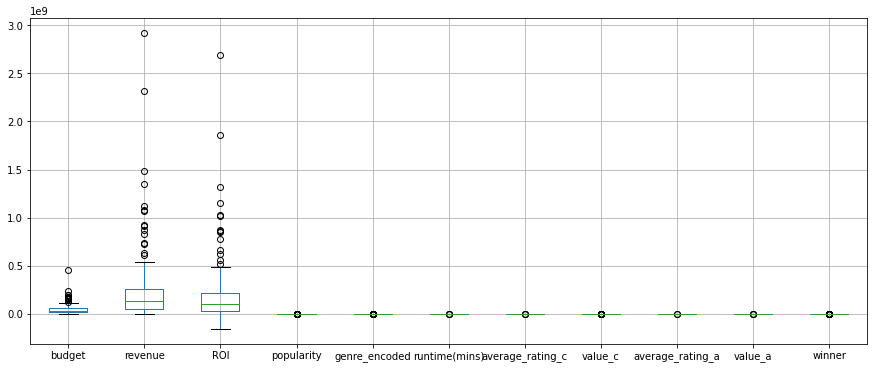

,count,mean,std,min,25%,50%,75%,max
budget,147.0,"48,006,551.02040816","59,101,884.601315156",0.0,"14,500,000.0","25,000,000.0","56,500,000.0","460,000,000.0"
revenue,147.0,"253,576,657.6734694","388,185,671.6797954",0.0,"51,931,343.5","135,330,182.0","255,839,627.5","2,923,706,026.0"
ROI,147.0,"205,570,106.6530612","344,875,888.5228092","-158,031,147.0","34,415,386.0","105,346,506.0","217,506,226.5","2,686,706,026.0"
popularity,147.0,39.84602040816325,38.500316483038176,10.853,20.241,27.901,43.620000000000005,338.229
genre_encoded,147.0,3.020408163265306,2.955073157556045,0.0,2.0,2.0,3.0,14.0
runtime(mins),147.0,129.89115646258503,22.535855525581283,91.0,114.0,129.0,141.0,209.0
average_rating_c,147.0,8.011564625850337,0.6515016381357174,6.0,7.6,8.1,8.5,9.4
value_c,147.0,88.65986394557824,8.711114455100194,60.0,85.5,91.0,94.5,99.0
average_rating_a,147.0,4.082993197278915,0.26878064327622503,3.3,3.9,4.1,4.25,4.9
value_a,147.0,84.14285714285714,7.502510995185327,60.0,80.0,86.0,89.5,99.0


In [61]:
# Outliers?
oscar_cleaned.boxplot(figsize = (15,6)) # make boxplot to see outliers
plt.show()
oscar_cleaned.describe().T

In [62]:
# I would argue that although some of the datapoints are outliers, they are important to keep in. 
# I will not remove them

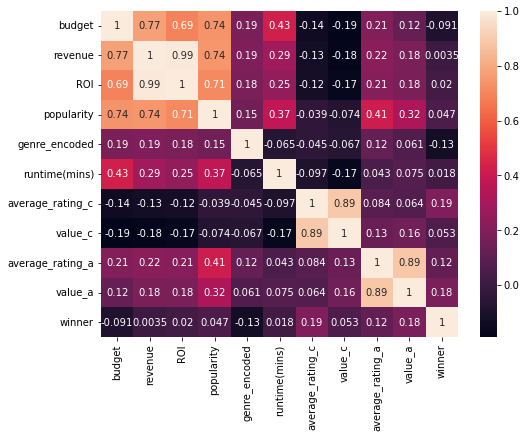

In [63]:
fig, ax = plt.subplots(figsize=(8,6))  
sns.heatmap(oscar_cleaned.corr(), annot = True,ax=ax)
plt.show()

In [116]:
# extract features
X = oscar_cleaned.iloc[:,:10] 
Y = oscar_cleaned.iloc[:,11].astype(int)

print(X.shape)
print(Y.shape)

(147, 10)
(147,)


In [100]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2, stratify=Y)

In [102]:
print('Labels count in y:', np.bincount(Y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
# print(X_train)

Labels count in y: [129  18]
Labels count in y_train: [90 12]
Labels count in y_test: [39  6]
(102, 9)
(45, 9)


In [103]:
# Standardize features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.shape)
print(X_test_std.shape)

(102, 9)
(45, 9)


In [104]:
# Train Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_std, y_train)

LogisticRegression()

In [105]:
model.coef_
# showing which features are most important.

array([[-0.38190887,  0.0075316 ,  0.06935387,  0.40505309, -0.6725057 ,
        -0.05683377,  1.35363516, -1.11430711,  0.12563188]])

In [106]:
# Check model accuracy
from sklearn import metrics 
y_pred = model.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.8666666666666667


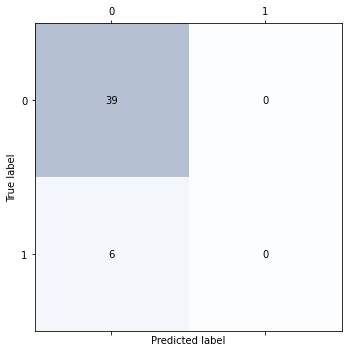

In [107]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [109]:
X_test_std

array([[-0.51169847, -0.41983769, -0.38781538, -0.51436111, -0.32462407,
        -0.13699862,  1.21596441,  0.95659259,  0.77832229],
       [-0.5276054 , -0.48798825, -0.46148223, -0.5829496 , -0.00315169,
         0.37424015,  0.34047003,  0.30320569,  0.02582112],
       [ 1.55620296,  0.55225766,  0.36923815, -0.14933788,  2.24715498,
        -1.0742697 , -1.55643444, -3.07262666, -1.47918122],
       [-0.82983715, -0.61237529, -0.55234962, -0.16415041,  0.31832069,
        -0.77604709,  0.19455431,  0.19430787,  0.77832229],
       [-0.55941927, -0.30086389, -0.24716732, -0.54143309,  1.92568259,
        -1.6281117 , -0.24319288,  0.52100132, -0.35042947],
       [ 1.87434164, -0.22221804, -0.54752459, -0.26567609, -0.64609645,
        -0.26480832,  0.48638576,  0.52100132, -0.72668005],
       [-0.59123314, -0.36381311, -0.31248024, -0.67886308, -0.32462407,
        -1.24468263,  0.63230149,  0.95659259, -1.10293064],
       [-0.623047  , -0.56350318, -0.53069431, -0.40625719, -0

In [30]:
# Data is unbalanced. Going to drop half the columns that are losers
# Seperate the winners and the losers
winners_df = oscar_cleaned[oscar_cleaned["winner"] == True]
losers_df = oscar_cleaned[oscar_cleaned["winner"] == False]
winners_df.head(3)

,movie,budget,revenue,ROI,popularity,genre_encoded,runtime(mins),average_rating_c,value_c,average_rating_a,value_a,winner
3,Gladiator,103000000,465361176,362361176,63.604,3,155,7.4,80.0,3.8,87,True
5,A Beautiful Mind,58000000,316800000,258800000,80.643,2,135,7.2,74.0,4.3,93,True
10,Chicago,45000000,306776732,261776732,19.741,0,113,8.0,86.0,4.0,83,True


In [32]:
losers_df.head(3)

,movie,budget,revenue,ROI,popularity,genre_encoded,runtime(mins),average_rating_c,value_c,average_rating_a,value_a,winner
0,Chocolat,25000000,152500343,127500343,16.956,0,121,6.0,63.0,4.0,83,False
1,"Crouching Tiger, Hidden Dragon",17000000,213525736,196525736,24.728,1,120,8.7,98.0,4.1,86,False
2,Erin Brockovich,52000000,256271286,204271286,23.903,2,131,7.5,85.0,3.9,81,False


In [35]:
losers_sample = losers_df.sample(frac=0.5)
print(f"Original losers size: {len(losers_df)}")
print(f"New losers size: {len(losers_sample)}")
losers_sample.head(3)

Original losers size: 129
New losers size: 64


,movie,budget,revenue,ROI,popularity,genre_encoded,runtime(mins),average_rating_c,value_c,average_rating_a,value_a,winner
167,Tár,35000000,29000000,-6000000,37.083,2,158,8.3,91.0,3.9,74,False
140,1917,100000000,394638258,294638258,51.044,10,119,8.3,89.0,4.4,88,False
117,Call Me by Your Name,4000000,43143046,39143046,48.007,11,132,8.7,94.0,4.3,86,False


In [39]:
reduced_oscar_df = pd.concat([winners_df,losers_sample]).reset_index().drop(columns="index")
reduced_oscar_df.head(3)

,movie,budget,revenue,ROI,popularity,genre_encoded,runtime(mins),average_rating_c,value_c,average_rating_a,value_a,winner
0,Gladiator,103000000,465361176,362361176,63.604,3,155,7.4,80.0,3.8,87,True
1,A Beautiful Mind,58000000,316800000,258800000,80.643,2,135,7.2,74.0,4.3,93,True
2,Chicago,45000000,306776732,261776732,19.741,0,113,8.0,86.0,4.0,83,True


In [41]:
reduced_oscar_df["winner"].value_counts()

False    64
True     18
Name: winner, dtype: int64

In [ ]:
# Retrain model

In [42]:
# extract features
X = reduced_oscar_df.iloc[:,1:10] 
Y = reduced_oscar_df.iloc[:,11].astype(int)

print(X.shape)
print(Y.shape)

(82, 9)
(82,)


In [43]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2, stratify=Y)

In [45]:
print('Labels count in y:', np.bincount(Y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
# print(X_train)

Labels count in y: [64 18]
Labels count in y_train: [44 13]
Labels count in y_test: [20  5]
(57, 9)
(25, 9)


In [46]:
# Standardize features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.shape)
print(X_test_std.shape)

(57, 9)
(25, 9)


In [47]:
# Train Model
model = LogisticRegression()
model.fit(X_train_std, y_train)

LogisticRegression()

In [48]:
model.coef_
# showing which features are most important.

array([[-0.84815638,  0.2673454 ,  0.44591116,  0.02155729, -0.38709101,
        -0.0863595 ,  1.39689348, -1.22430835,  0.24759413]])

In [49]:
# Check model accuracy
y_pred = model.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

0.84


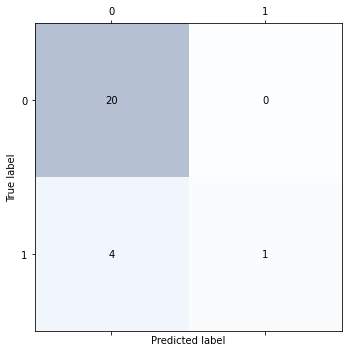

In [51]:
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()